<a href="https://colab.research.google.com/github/Donryak/DNN-Model-for-Inductor-Design/blob/main/DNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT Library

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

# IMPORT Data(from Google Drive)

In [ ]:
#구글 드라이브 import
from google.colab import drive
drive.mount('/content/drive')

 #구글드라이브에서 데이터셋 업로드
file_path = '/content/drive/MyDrive/Capstone1/제작 자료/ML_DATASET/Capstone_ML_IND_DATA.csv'

data = pd.read_csv(file_path)

print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      N   L1   L2     W     S  S(1,1)_Magnitude  S(1,1)_Phase  Inductance  \
0  0.25  2.0  2.0  0.15  0.20             0.994       151.907      22.121   
1  0.25  2.0  2.0  0.10  0.10             0.996       161.634      14.294   
2  0.25  2.0  2.0  0.10  0.15             0.996       161.634      14.294   
3  0.25  2.0  2.0  0.10  0.25             0.996       161.634      14.294   
4  0.25  2.0  2.0  0.15  0.15             0.997       164.453      12.070   

   Q_factor  
0    82.594  
1    73.614  
2    73.614  
3    73.614  
4    94.824  


# DNN Model
 S-parameters to Geometric parameters

In [ ]:
# 데이터 분할
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[['Inductance', 'Q_factor']].values)
Y_train = train_data[['N', 'L1', 'L2', 'W', 'S']].values
X_test = scaler.transform(test_data[['Inductance', 'Q_factor']].values)
Y_test = test_data[['N', 'L1', 'L2', 'W', 'S']].values

# 신경망 모델 설계
model = Sequential([
    Dense(512, input_dim=2, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(5, activation='linear')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0005), loss=Huber())

# 모델 훈련
history = model.fit(X_train, Y_train, epochs=200, batch_size=16, validation_data=(X_test, Y_test), verbose=1, callbacks=[reduce_lr])

Epoch 1/200
1024/1024 [==============================] - 10s 7ms/step - loss: 0.4032 - val_loss: 0.2545 - lr: 5.0000e-04
Epoch 2/200
1024/1024 [==============================] - 7s 6ms/step - loss: 0.2898 - val_loss: 0.2484 - lr: 5.0000e-04
Epoch 3/200
1024/1024 [==============================] - 8s 8ms/step - loss: 0.2710 - val_loss: 0.2330 - lr: 5.0000e-04
Epoch 4/200
1024/1024 [==============================] - 5s 5ms/step - loss: 0.2590 - val_loss: 0.2265 - lr: 5.0000e-04
Epoch 5/200
1024/1024 [==============================] - 7s 7ms/step - loss: 0.2518 - val_loss: 0.2304 - lr: 5.0000e-04
Epoch 6/200
1024/1024 [==============================] - 6s 6ms/step - loss: 0.2447 - val_loss: 0.2169 - lr: 5.0000e-04
Epoch 7/200
1024/1024 [==============================] - 5s 5ms/step - loss: 0.2409 - val_loss: 0.2231 - lr: 5.0000e-04
Epoch 8/200
1024/1024 [==============================] - 7s 7ms/step - loss: 0.2368 - val_loss: 0.2203 - lr: 5.0000e-04
Epoch 9/200
1024/1024 [================

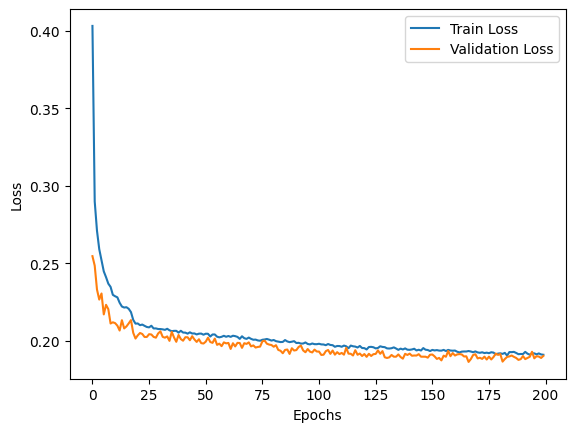

Final Training Loss: 0.19084331393241882
Final Validation Loss: 0.19009532034397125


In [ ]:

# 훈련 손실과 검증 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 최종 손실 값 출력
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")


In [ ]:
# 저장 경로 설정
model_save_path = '/content/drive/MyDrive/Capstone1/제작 자료/DNN MODEL/TR_model'
scaler_save_path = '/content/drive/MyDrive/Capstone1/제작 자료/DNN MODEL/scaler.pkl'

# 모델 저장
model.save(model_save_path)
joblib.dump(scaler, scaler_save_path)

# 모델과 스케일러 저장 확인
if os.path.exists(model_save_path) and os.path.exists(scaler_save_path):
    print("Model and scaler files are saved successfully!")
else:
    print("Model or scaler file is missing after save attempt.")

Model and scaler files are saved successfully!
